In [1]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.master('local[2]').appName('Sunny').getOrCreate()
spark

In [3]:
data = spark.read.csv('Car_sales.csv', inferSchema = True, header = True)

In [4]:
data.show()

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|Manufacturer|      Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|
+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+
|       Acura|    Integra|            16.919|                 16.36|   Passenger|              21.5|        1.8|       140|    101.2| 67.3| 172.4|      2.639|         13.2|             28|     2/2/2012|      58.28014952|
|       Acura|         TL|            39.384|                19.875|   Passenger|              28.4|        3.2|    

In [5]:
data.describe().show()

+-------+------------+------+------------------+----------------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------+
|summary|Manufacturer| Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|       Engine_size|        Horsepower|         Wheelbase|             Width|            Length|       Curb_weight|     Fuel_capacity|   Fuel_efficiency|Latest_Launch| Power_perf_factor|
+-------+------------+------+------------------+----------------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------+
|  count|         157|   157|               157|                   121|         157|               155|               156|           

In [6]:
data.columns

['Manufacturer',
 'Model',
 'Sales_in_thousands',
 'four_year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor']

In [7]:
pd_df = data.toPandas()

In [8]:
pd_df.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [9]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
four_year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


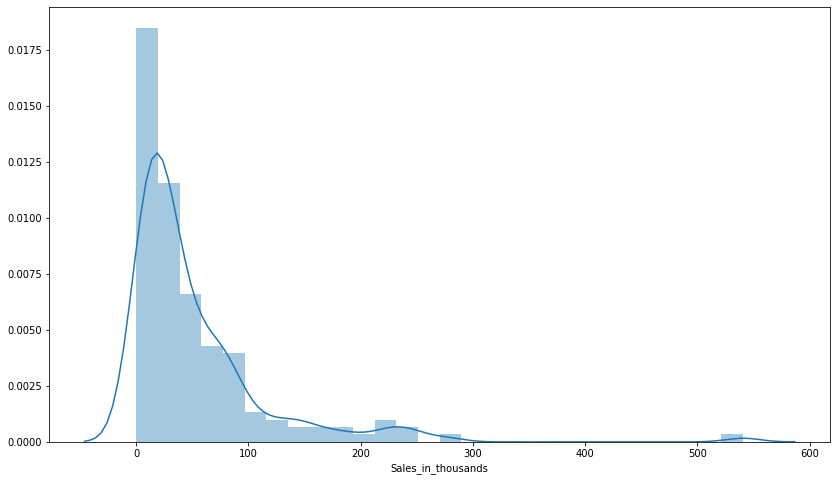

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (14,8)



sns.distplot(pd_df['Sales_in_thousands'])  # actual Target Value

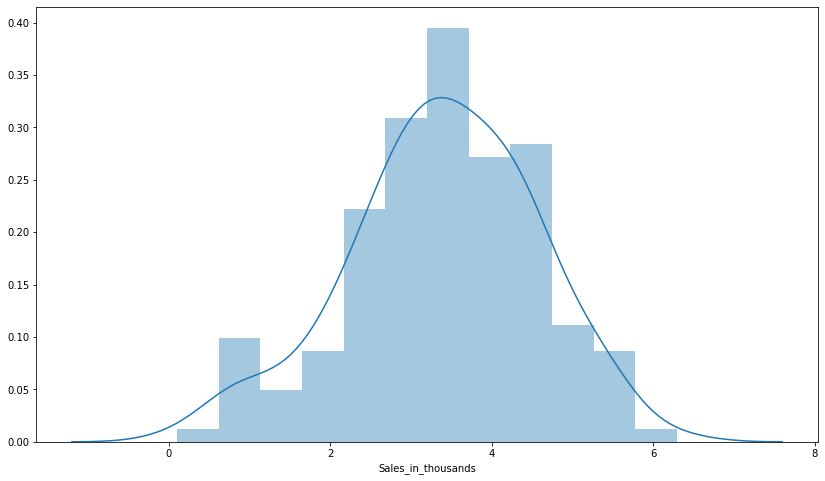

In [11]:
sns.distplot(np.log(pd_df['Sales_in_thousands']+1))  # log_sales

In [12]:
data = data.withColumn('log_sales', round(log('Sales_in_thousands'),2))

In [13]:
pd_df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [14]:
pd_df.isnull().sum()

Manufacturer               0
Model                      0
Sales_in_thousands         0
four_year_resale_value    36
Vehicle_type               0
Price_in_thousands         2
Engine_size                1
Horsepower                 1
Wheelbase                  1
Width                      1
Length                     1
Curb_weight                2
Fuel_capacity              1
Fuel_efficiency            3
Latest_Launch              0
Power_perf_factor          2
dtype: int64

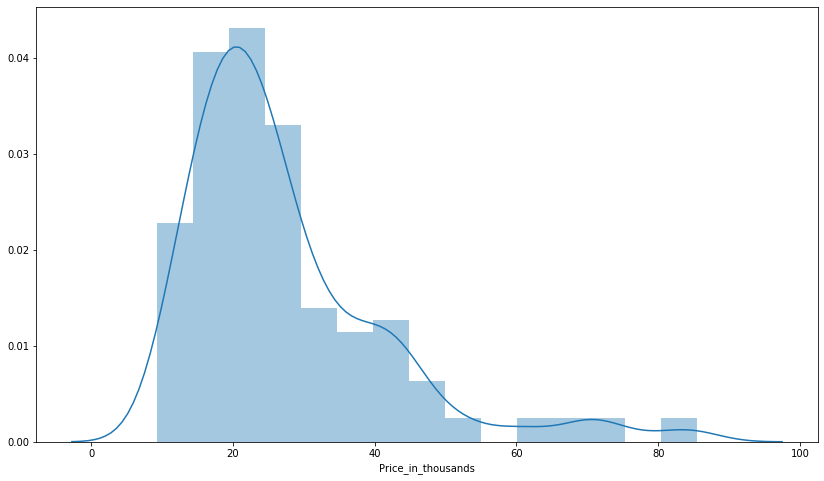

In [15]:
sns.distplot(pd_df['Price_in_thousands'])

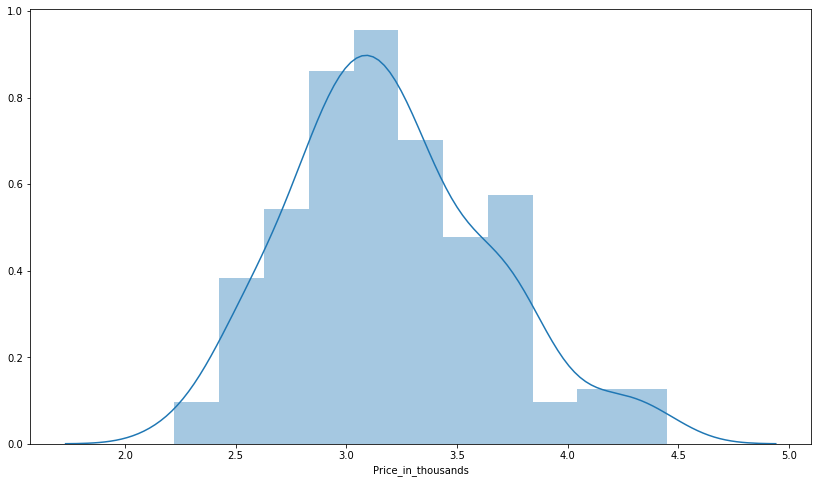

In [16]:
sns.distplot(np.log(pd_df['Price_in_thousands']))

In [17]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

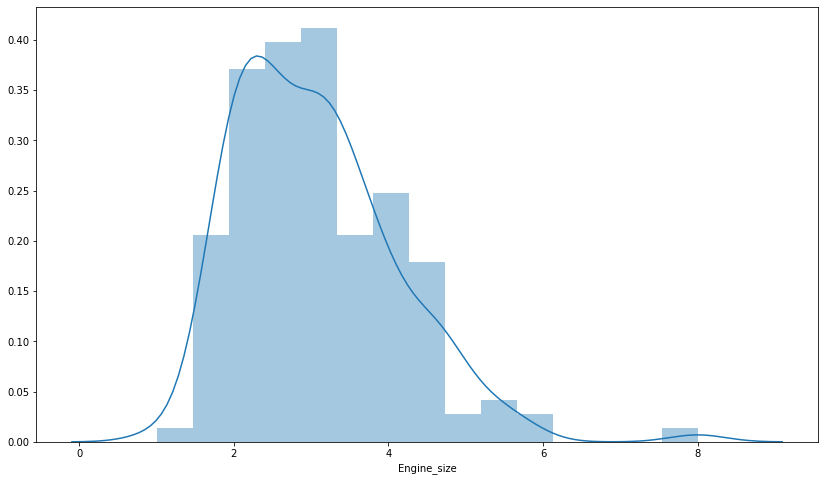

In [18]:
sns.distplot(pd_df['Engine_size'])

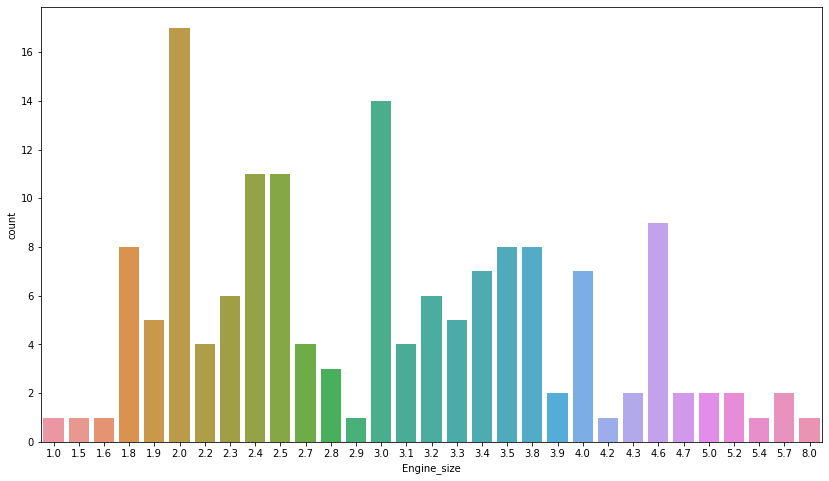

In [19]:
sns.countplot(pd_df['Engine_size'])

In [20]:
pd_df['Engine_size'].unique()

array([1.8, 3.2, 3.5, 2.8, 4.2, 2.5, 3.1, 3.8, 4.6, 3. , 5.7, 2.2, 3.4,
       1. , 2.7, 2. , nan, 8. , 5.2, 3.9, 2.4, 4. , 1.6, 2.3, 1.5, 4.7,
       5.4, 3.3, 4.3, 5. , 1.9, 2.9])

In [21]:
pd_df['Engine_size'].value_counts()

2.0    17
3.0    14
2.5    11
2.4    11
4.6     9
3.5     8
3.8     8
1.8     8
4.0     7
3.4     7
3.2     6
2.3     6
3.3     5
1.9     5
2.2     4
2.7     4
3.1     4
2.8     3
5.7     2
5.2     2
5.0     2
4.3     2
3.9     2
4.7     2
4.2     1
1.5     1
2.9     1
8.0     1
5.4     1
1.0     1
1.6     1
Name: Engine_size, dtype: int64

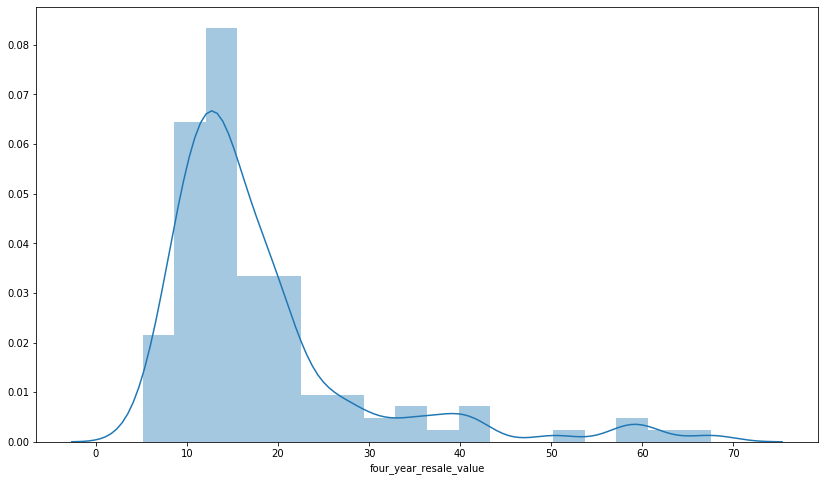

In [22]:
sns.distplot(pd_df['four_year_resale_value'])

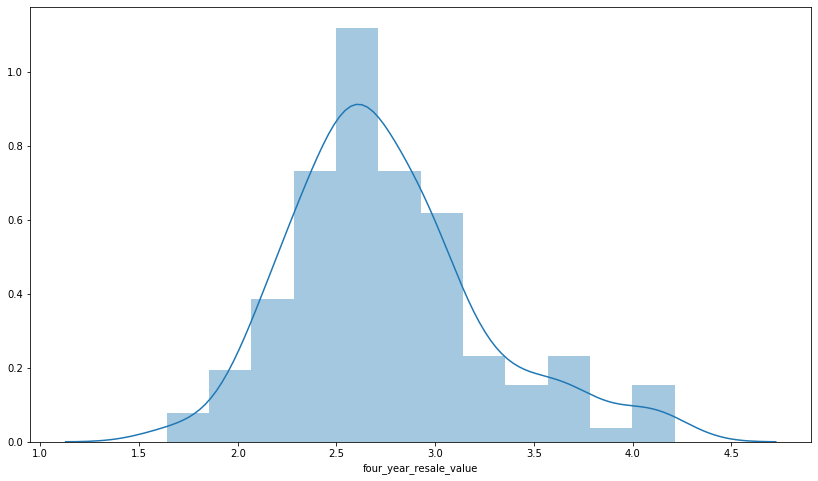

In [23]:
sns.distplot(np.log(pd_df['four_year_resale_value']))

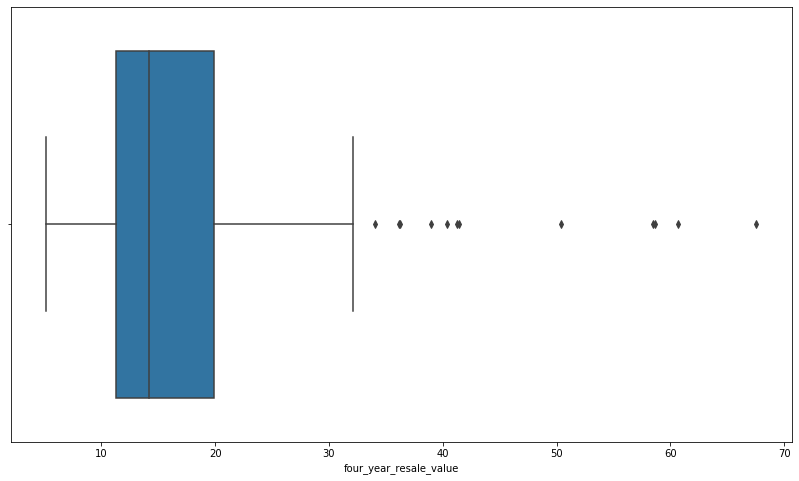

In [24]:
sns.boxplot(pd_df['four_year_resale_value'])

In [26]:
continious_df = pd_df.select_dtypes(['int','float'])

continious_df.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


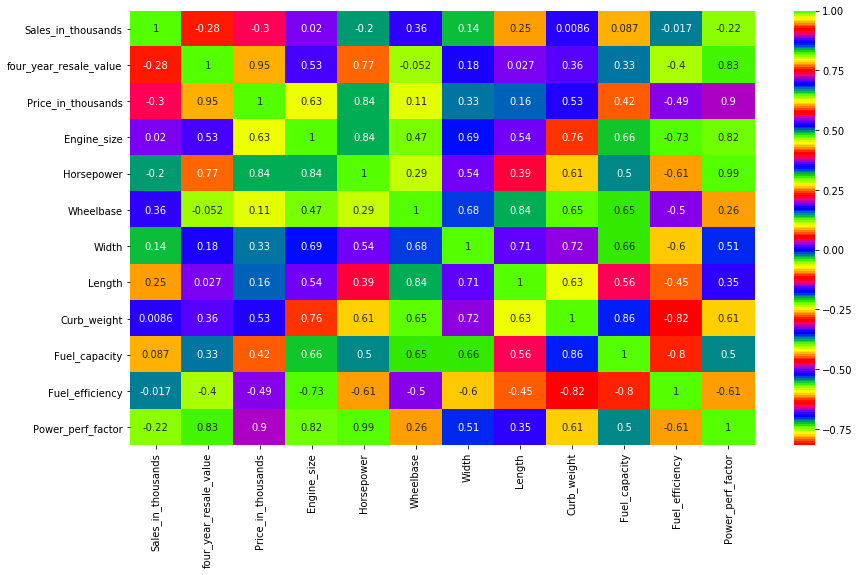

In [27]:
sns.heatmap(continious_df.corr(), annot = True, cmap = 'prism')

In [28]:
continious_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sales_in_thousands      157 non-null    float64
 1   four_year_resale_value  121 non-null    float64
 2   Price_in_thousands      155 non-null    float64
 3   Engine_size             156 non-null    float64
 4   Horsepower              156 non-null    float64
 5   Wheelbase               156 non-null    float64
 6   Width                   156 non-null    float64
 7   Length                  156 non-null    float64
 8   Curb_weight             155 non-null    float64
 9   Fuel_capacity           156 non-null    float64
 10  Fuel_efficiency         154 non-null    float64
 11  Power_perf_factor       155 non-null    float64
dtypes: float64(12)
memory usage: 14.8 KB


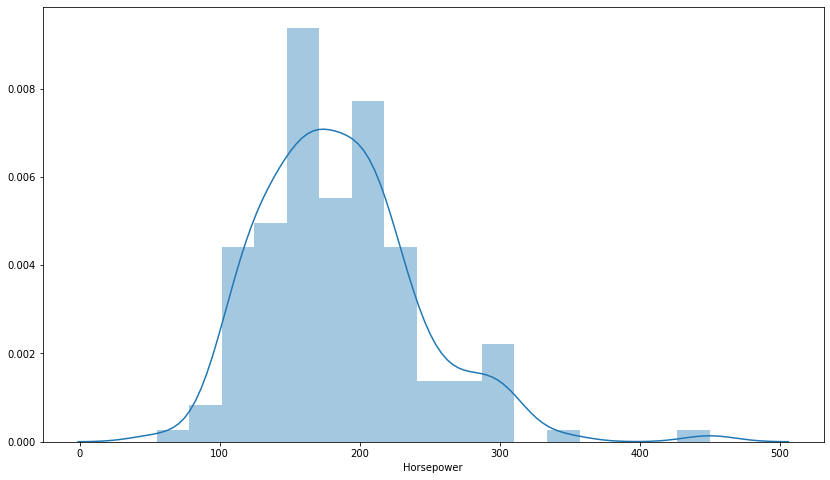

In [29]:
sns.distplot(pd_df['Horsepower'])

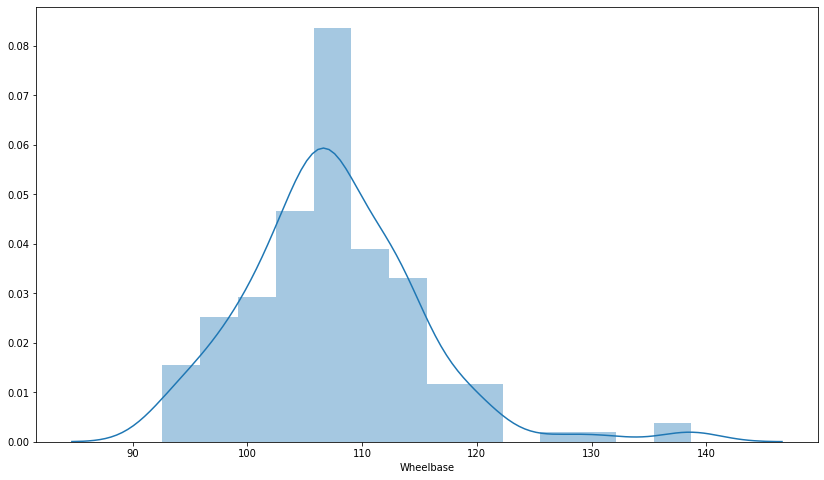

In [30]:
sns.distplot(pd_df['Wheelbase'])

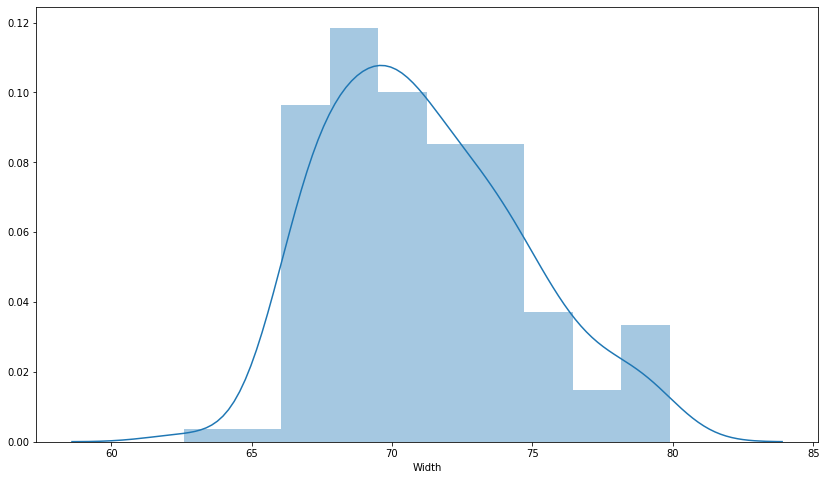

In [31]:
sns.distplot(pd_df['Width'])

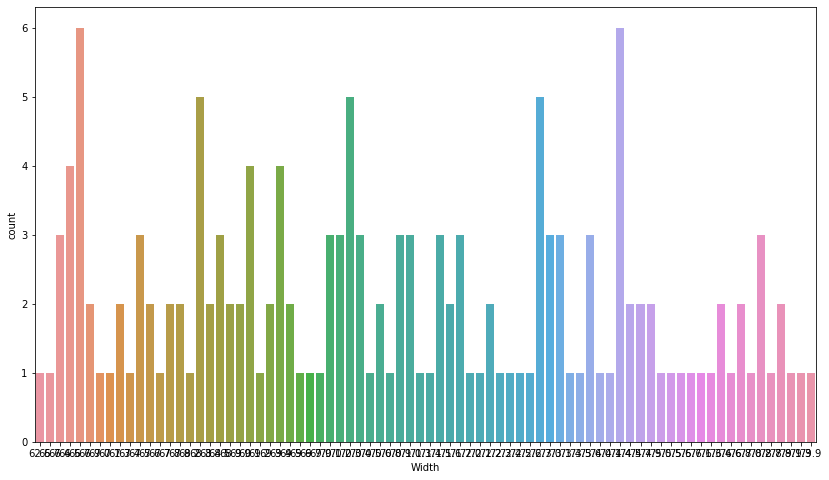

In [32]:
sns.countplot(pd_df['Width'])

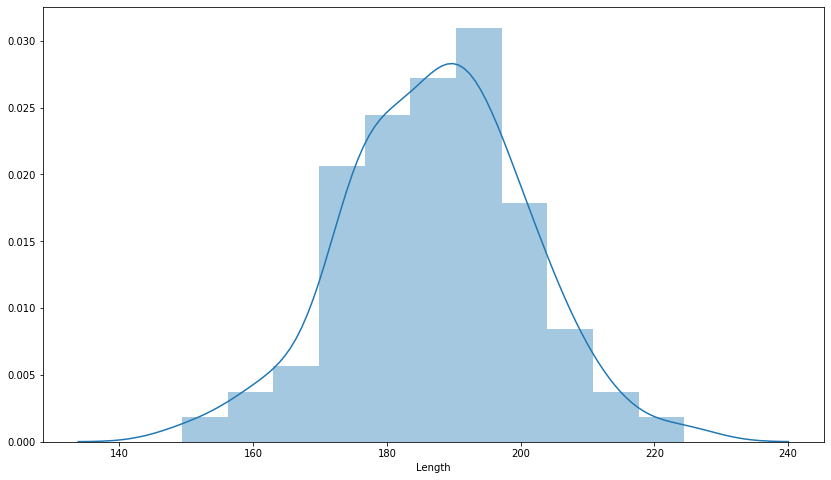

In [33]:
sns.distplot(pd_df['Length'])

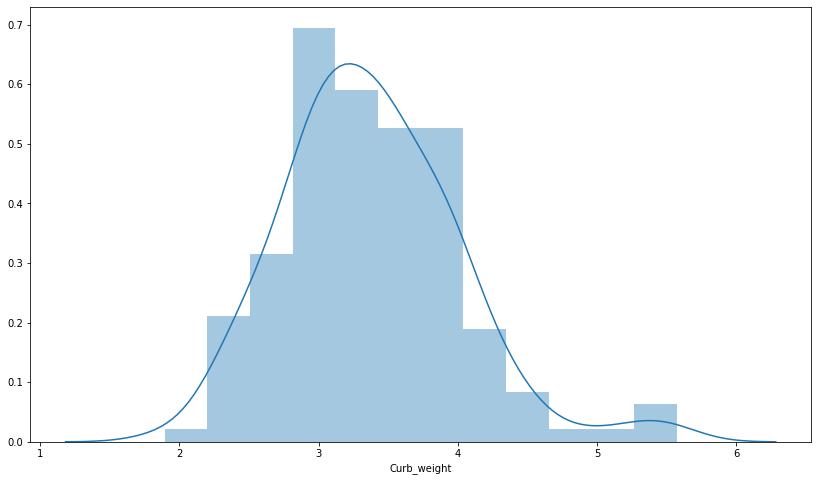

In [34]:
sns.distplot(pd_df['Curb_weight'])

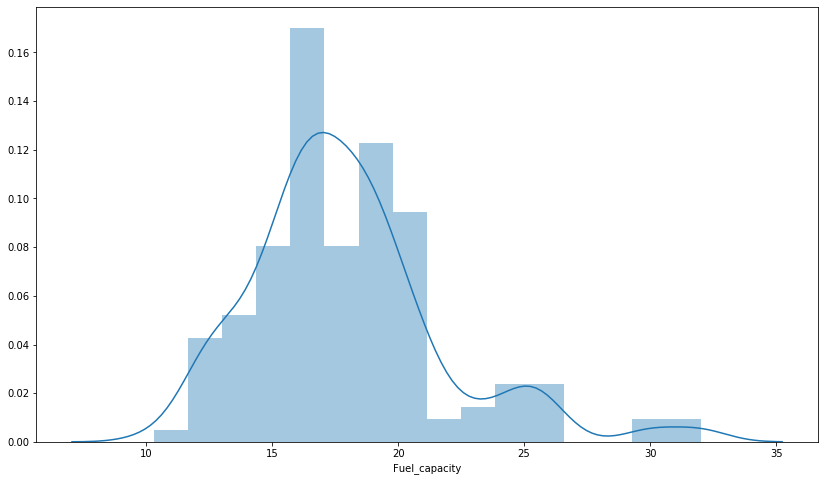

In [35]:
sns.distplot(pd_df['Fuel_capacity'])

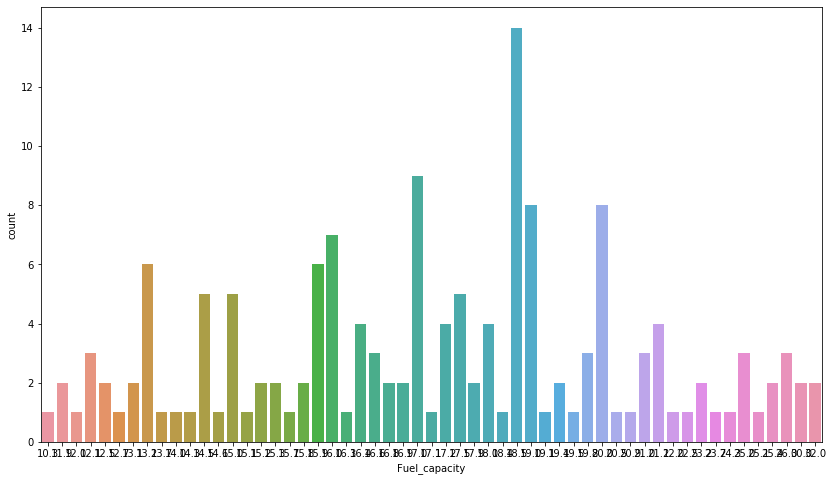

In [36]:
sns.countplot(pd_df['Fuel_capacity'])

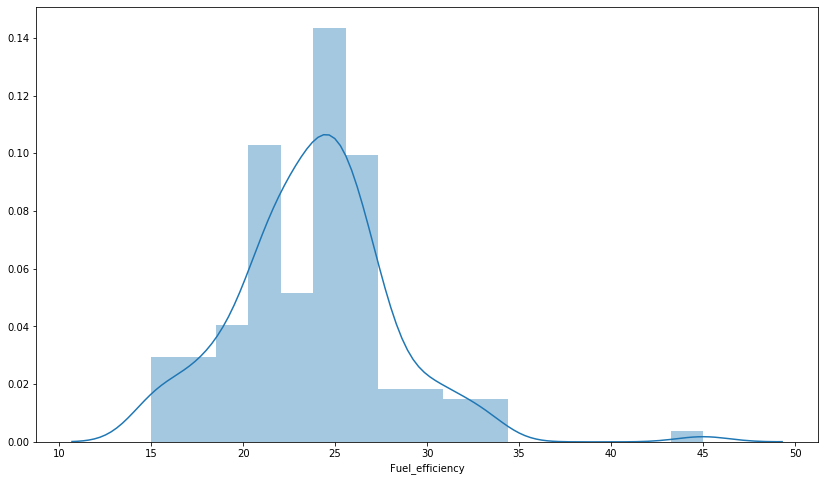

In [37]:
sns.distplot(pd_df['Fuel_efficiency'])

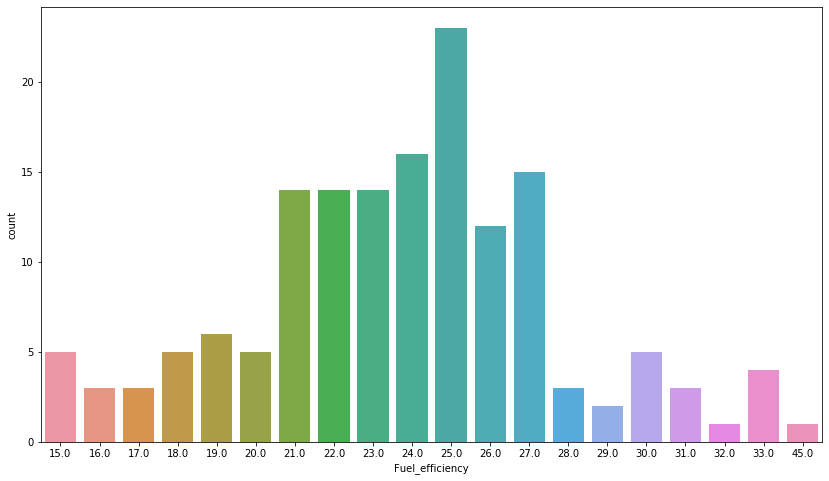

In [38]:
sns.countplot(pd_df['Fuel_efficiency'])

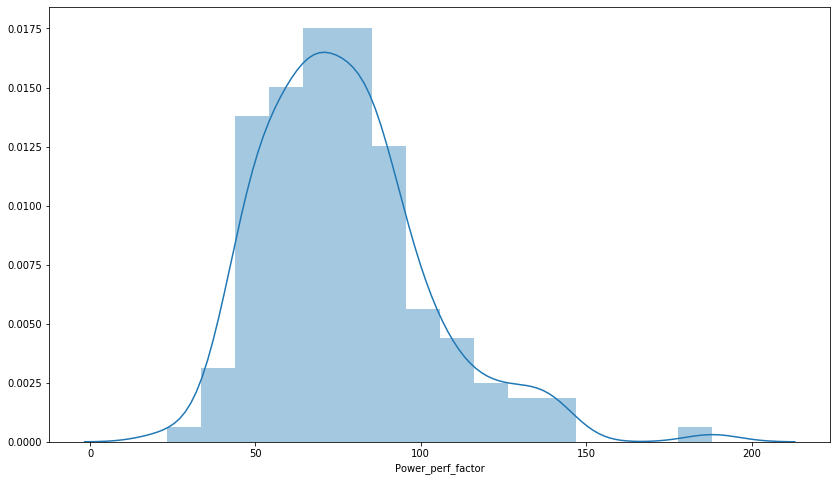

In [39]:
sns.distplot(pd_df['Power_perf_factor'])

In [40]:
# from pyspark.ml.feature import Imputer

# imputer = Imputer(
#     inputCols = ['four_year_resale_value', 'Price_in_thousands', 'Fuel_efficiency'],
#     outputCols = ["{}_imputed".format(a) for a in ['four_year_resale_value', 'Price_in_thousands', 'Fuel_efficiency']]
# ).setStrategy("mean")

# # imputer.fit(data).transform(data).show()

In [41]:
pd_df.shape

(157, 16)

In [42]:
def missing(x):
    if((x.dtype == 'int')or(x.dtype == 'float')):
        x = x.fillna(np.mean(x))
    else:
        #x = x.fillna(np.mode(x))
        x = x
        
    return x

In [43]:
pd_df = pd_df.apply(lambda y: missing(y))

In [44]:
pd_df.isnull().sum()

Manufacturer              0
Model                     0
Sales_in_thousands        0
four_year_resale_value    0
Vehicle_type              0
Price_in_thousands        0
Engine_size               0
Horsepower                0
Wheelbase                 0
Width                     0
Length                    0
Curb_weight               0
Fuel_capacity             0
Fuel_efficiency           0
Latest_Launch             0
Power_perf_factor         0
dtype: int64

In [45]:
new_data = spark.createDataFrame(pd_df)

In [46]:
new_data.show()

+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------------+-------------+---------------+-------------+-----------------+
|Manufacturer|      Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|      Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|
+------------+-----------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------------+-------------+---------------+-------------+-----------------+
|       Acura|    Integra|            16.919|                 16.36|   Passenger|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|            2.639|         13.2|           28.0|     2/2/2012|      58.28014952|
|       Acura|         TL|            39.384|                19.875|   Passenger|           

In [47]:
new_data.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Sales_in_thousands: double (nullable = true)
 |-- four_year_resale_value: double (nullable = true)
 |-- Vehicle_type: string (nullable = true)
 |-- Price_in_thousands: double (nullable = true)
 |-- Engine_size: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Wheelbase: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Length: double (nullable = true)
 |-- Curb_weight: double (nullable = true)
 |-- Fuel_capacity: double (nullable = true)
 |-- Fuel_efficiency: double (nullable = true)
 |-- Latest_Launch: string (nullable = true)
 |-- Power_perf_factor: double (nullable = true)



In [48]:
new_data.describe().show()

+-------+------------+------+------------------+----------------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------+-----------------+
|summary|Manufacturer| Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|       Engine_size|        Horsepower|         Wheelbase|             Width|            Length|       Curb_weight|    Fuel_capacity|   Fuel_efficiency|Latest_Launch|Power_perf_factor|
+-------+------------+------+------------------+----------------------+------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------+-----------------+
|  count|         157|   157|               157|                   157|         157|               157|               157|               15

In [49]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [50]:
type(new_data)

pyspark.sql.dataframe.DataFrame

In [51]:
new_data = new_data.withColumn('log_sales', round(log('Sales_in_thousands'),2))

In [52]:
new_data.show(5)

+------------+-------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+---------+
|Manufacturer|  Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|log_sales|
+------------+-------+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+---------+
|       Acura|Integra|            16.919|                 16.36|   Passenger|              21.5|        1.8|     140.0|    101.2| 67.3| 172.4|      2.639|         13.2|           28.0|     2/2/2012|      58.28014952|     2.83|
|       Acura|     TL|            39.384|                19.875|   Passenger|              2

In [53]:
new_data.columns

['Manufacturer',
 'Model',
 'Sales_in_thousands',
 'four_year_resale_value',
 'Vehicle_type',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Latest_Launch',
 'Power_perf_factor',
 'log_sales']

In [54]:
pd_df['Manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

Text(0, 0.5, 'Sum of Sales')

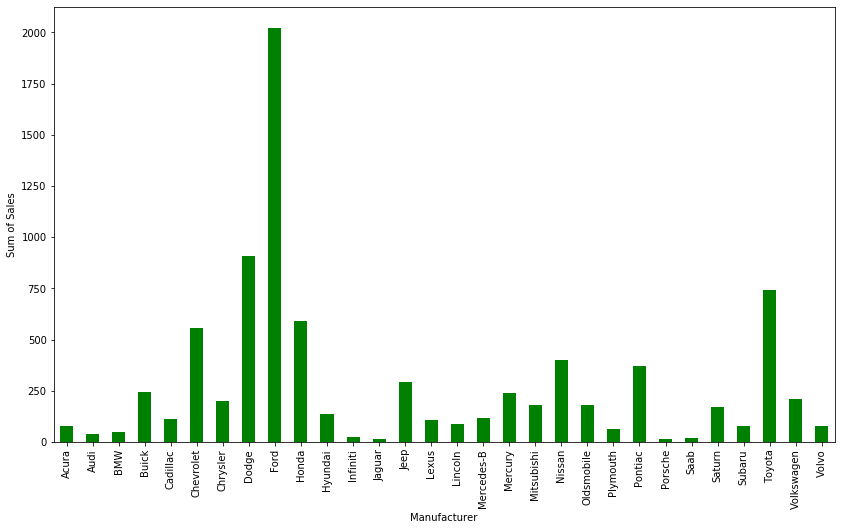

In [55]:
pd_df.groupby('Manufacturer')['Sales_in_thousands'].sum().plot(kind = 'bar', color = 'green')
plt.ylabel('Sum of Sales')

In [56]:
pd_df['Model'].unique()

array(['Integra', 'TL', 'CL', 'RL', 'A4', 'A6', 'A8', '323i', '328i',
       '528i', 'Century', 'Regal', 'Park Avenue', 'LeSabre', 'DeVille',
       'Seville', 'Eldorado', 'Catera', 'Escalade', 'Cavalier', 'Malibu',
       'Lumina', 'Monte Carlo', 'Camaro', 'Corvette', 'Prizm', 'Metro',
       'Impala', 'Sebring Coupe', 'Sebring Conv.', 'Concorde', 'Cirrus',
       'LHS', 'Town & Country', '300M', 'Neon', 'Avenger', 'Stratus',
       'Intrepid', 'Viper', 'Ram Pickup', 'Ram Wagon', 'Ram Van',
       'Dakota', 'Durango', 'Caravan', 'Escort', 'Mustang', 'Contour',
       'Taurus', 'Focus', 'Crown Victoria', 'Explorer', 'Windstar',
       'Expedition', 'Ranger', 'F-Series', 'Civic', 'Accord', 'CR-V',
       'Passport', 'Odyssey', 'Accent', 'Elantra', 'Sonata', 'I30',
       'S-Type', 'Wrangler', 'Cherokee', 'Grand Cherokee', 'ES300',
       'GS300', 'GS400', 'LS400', 'LX470', 'RX300', 'Continental',
       'Town car', 'Navigator', 'Mirage', 'Eclipse', 'Galant', 'Diamante',
       '3000GT',

Text(0, 0.5, 'Sum of Sales')

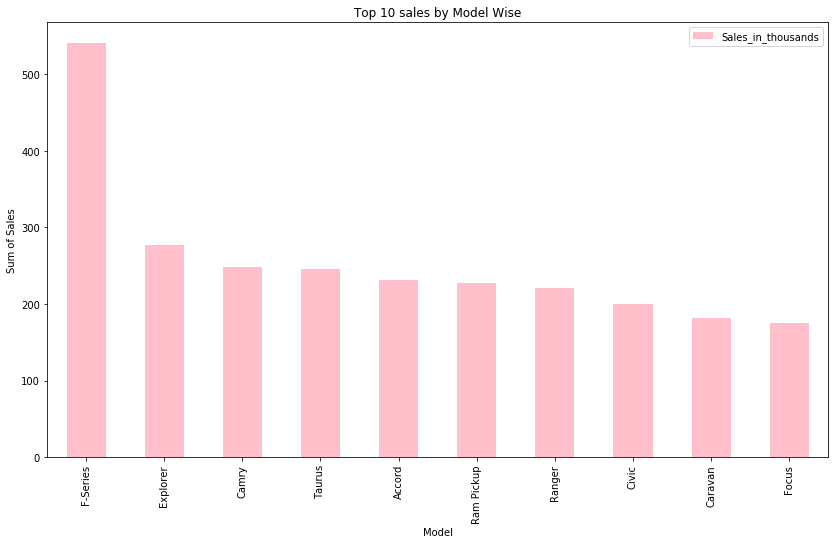

In [57]:
pd_df.groupby('Model')[['Sales_in_thousands']].sum().sort_values(by = 'Sales_in_thousands',ascending = False).head(10).plot(kind = 'bar', color = 'pink')

plt.title("Top 10 sales by Model Wise")

plt.ylabel('Sum of Sales')

Text(0, 0.5, 'Sum of Sales')

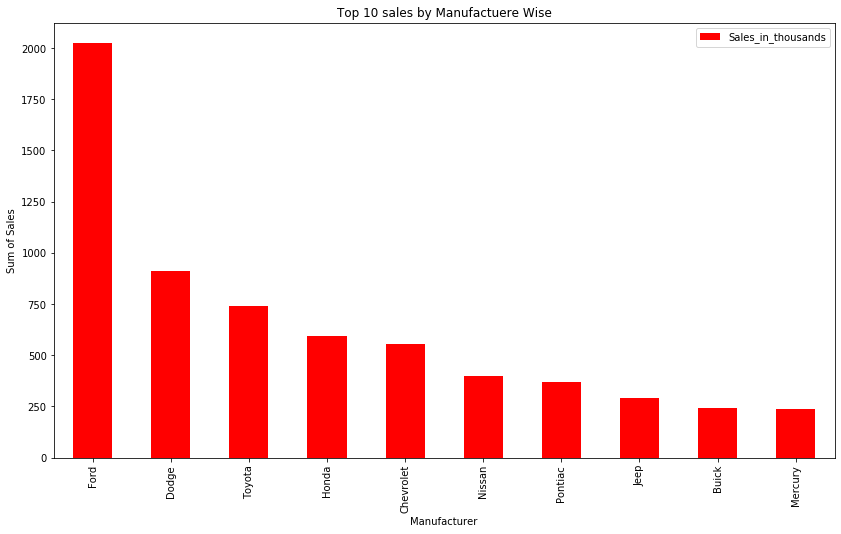

In [58]:
pd_df.groupby('Manufacturer')[['Sales_in_thousands']].sum().sort_values(by = 'Sales_in_thousands',ascending = False).head(10).plot(kind = 'bar', color = 'red')

plt.title("Top 10 sales by Manufactuere Wise")

plt.ylabel('Sum of Sales')

In [59]:
new_data.printSchema()

pd_df['Latest_Launch'] = pd.to_datetime(pd_df['Latest_Launch'])

pd_df['Latest_Launch']

root
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Sales_in_thousands: double (nullable = true)
 |-- four_year_resale_value: double (nullable = true)
 |-- Vehicle_type: string (nullable = true)
 |-- Price_in_thousands: double (nullable = true)
 |-- Engine_size: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Wheelbase: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Length: double (nullable = true)
 |-- Curb_weight: double (nullable = true)
 |-- Fuel_capacity: double (nullable = true)
 |-- Fuel_efficiency: double (nullable = true)
 |-- Latest_Launch: string (nullable = true)
 |-- Power_perf_factor: double (nullable = true)
 |-- log_sales: double (nullable = true)



0     2012-02-02
1     2011-06-03
2     2012-01-04
3     2011-03-10
4     2011-10-08
         ...    
152   2011-09-21
153   2012-11-24
154   2011-06-25
155   2011-04-26
156   2011-11-14
Name: Latest_Launch, Length: 157, dtype: datetime64[ns]

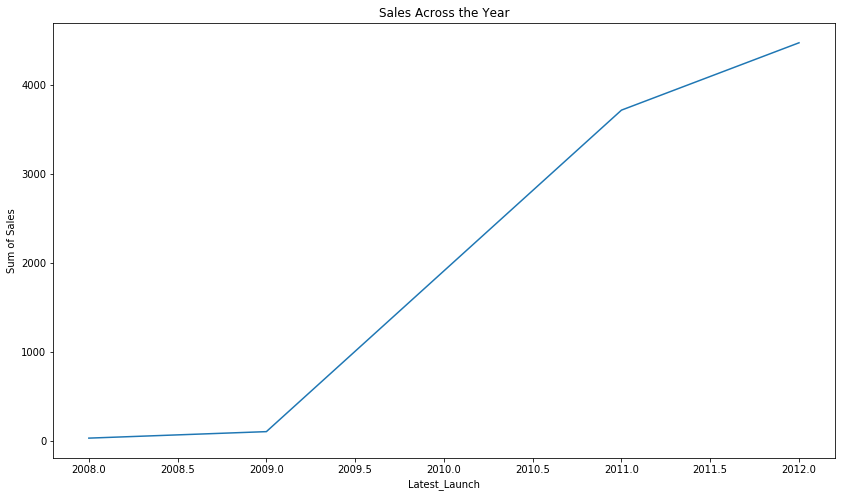

In [60]:
pd_df.groupby(pd_df['Latest_Launch'].dt.year)['Sales_in_thousands'].sum().plot()
plt.ylabel("Sum of Sales")
plt.title("Sales Across the Year")
plt.show(1)

Text(0.5, 1.0, 'Sales Monthly Wise')

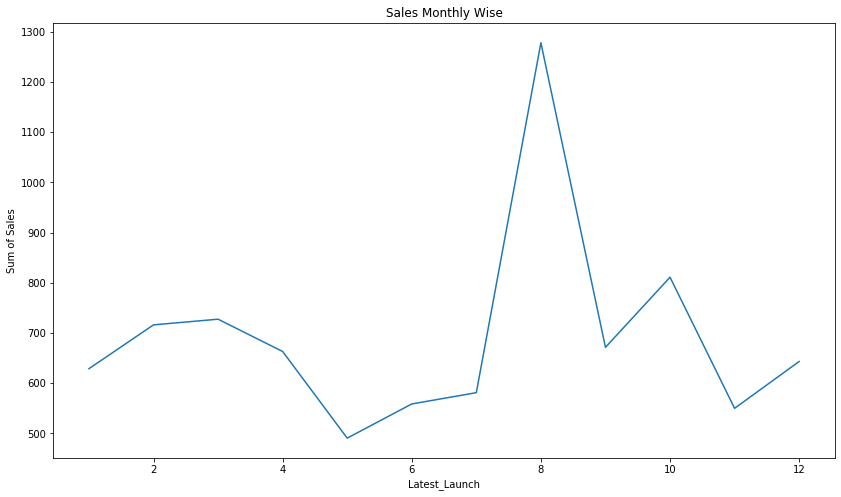

In [61]:
pd_df.groupby(pd_df['Latest_Launch'].dt.month)['Sales_in_thousands'].sum().plot()
plt.ylabel("Sum of Sales")
plt.title("Sales Monthly Wise")

Text(0.5, 1.0, 'Daily Sales')

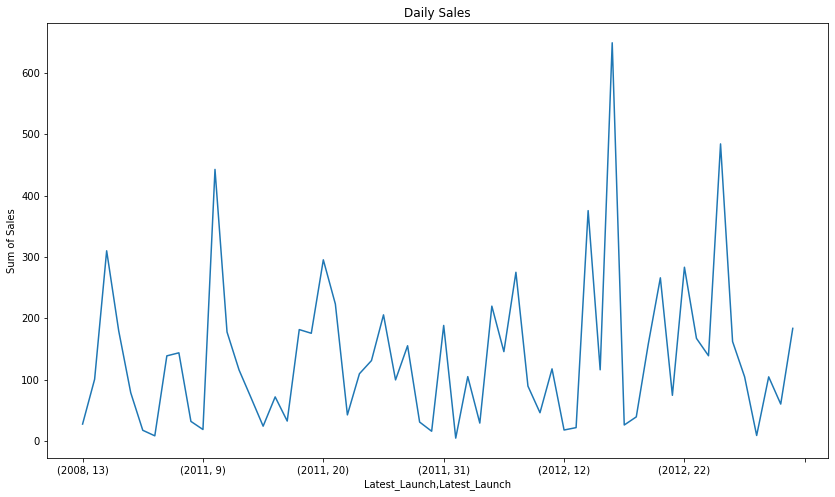

In [62]:
pd_df.groupby([pd_df['Latest_Launch'].dt.year,pd_df['Latest_Launch'].dt.day])['Sales_in_thousands'].sum().plot()
plt.ylabel('Sum of Sales')
plt.title("Daily Sales")

In [63]:
new_data.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Sales_in_thousands: double (nullable = true)
 |-- four_year_resale_value: double (nullable = true)
 |-- Vehicle_type: string (nullable = true)
 |-- Price_in_thousands: double (nullable = true)
 |-- Engine_size: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Wheelbase: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Length: double (nullable = true)
 |-- Curb_weight: double (nullable = true)
 |-- Fuel_capacity: double (nullable = true)
 |-- Fuel_efficiency: double (nullable = true)
 |-- Latest_Launch: string (nullable = true)
 |-- Power_perf_factor: double (nullable = true)
 |-- log_sales: double (nullable = true)



# Feature Engineering

In [64]:
pd.DataFrame(pd_df.corrwith(pd.to_numeric(pd_df['Sales_in_thousands'])), columns = ['Correlation with Actual Y'])

,Correlation with Actual Y
Sales_in_thousands,1.000000
four_year_resale_value,-0.266436
Price_in_thousands,-0.304413
Engine_size,0.019983
Horsepower,-0.197756
Wheelbase,0.358179
Width,0.140918
Length,0.254979
Curb_weight,0.008620
Fuel_capacity,0.086540


In [65]:
pd.DataFrame(pd_df.corrwith(np.log(pd.to_numeric(pd_df['Sales_in_thousands'])+1)), columns = ['Correlation with Log Y'])

,Correlation with Log Y
Sales_in_thousands,0.774984
four_year_resale_value,-0.463594
Price_in_thousands,-0.555605
Engine_size,-0.127360
Horsepower,-0.388696
Wheelbase,0.291823
Width,0.052747
Length,0.220745
Curb_weight,-0.047756
Fuel_capacity,-0.011100


In [66]:
pd.DataFrame(continious_df.apply(lambda x: np.std(x)/np.mean(x)*100),columns = ['Coefficient of Variation'])

,Coefficient of Variation
Sales_in_thousands,127.952609
four_year_resale_value,63.110571
Price_in_thousands,52.226683
Engine_size,34.019413
Horsepower,30.394561
Wheelbase,7.086215
Width,4.835967
Length,7.146567
Curb_weight,18.604490
Fuel_capacity,21.587882


In [68]:
new_data.select([count(when(col(c).isNull(),c)).alias(c) for c in new_data.columns]).show()

+------------+-----+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+---------+
|Manufacturer|Model|Sales_in_thousands|four_year_resale_value|Vehicle_type|Price_in_thousands|Engine_size|Horsepower|Wheelbase|Width|Length|Curb_weight|Fuel_capacity|Fuel_efficiency|Latest_Launch|Power_perf_factor|log_sales|
+------------+-----+------------------+----------------------+------------+------------------+-----------+----------+---------+-----+------+-----------+-------------+---------------+-------------+-----------------+---------+
|           0|    0|                 0|                     0|           0|                 0|          0|         0|        0|    0|     0|          0|            0|              0|            0|                0|        0|
+------------+-----+------------------+----------------------+------------+------------------+------

In [86]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer,VectorAssembler

In [ ]:
stringIndexer = StringIndexer(inputCol = ['Manufacturer','Model','Vehicle_type'],outputCol = ['Manufacturer_index','Model_index','Vehicle_type_index'])  

SI = stringIndexer.fit(new_data)

In [ ]:
indexer = StringIndexer(inputCols=input_col, outputCols=out_col) 
indexed = indexer.fit(newdf).transform(newdf) 
indexed.show()

In [ ]:
indexed = indexed.withColumn('label', log('Sales_in_thousands'))
indexed = indexed.withColumn('four_year_resale_value', log('four_year_resale_value'))
indexed = indexed.withColumn('Price_in_thousands', log('Price_in_thousands'))
indexed = indexed.withColumn('Engine_size', log('Engine_size'))

In [ ]:
indexed = indexed.dropna()

In [ ]:
# Vector Assembler

In [ ]:
assembler = VectorAssembler(inputCols = ['Indexed_Manufacturer',
 'Indexed_Vehicle_type',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor',
], outputCol = "features")

In [ ]:
data = assembler.transform(indexed).select('label','features')
data.show(10)

In [ ]:
# Train Test Split

In [ ]:
newdf = data.toDF('label','features')
newdf.show(5)

In [ ]:
train_df, test_df = newdf.randomSplit( [0.7, 0.3], seed = 42 )

In [ ]:
#Model Building

In [90]:
from pyspark.ml.regression import LinearRegression

In [ ]:
LR_model = LinearRegression()
LR_model = LR_model.fit(train_df)

In [ ]:
pred = LR_model.transform(test_df)
pred.show()

In [ ]:
dir(LR_model.summary)

In [ ]:
print('MSE: ', LR_model.summary.meanSquaredError)
print('r2 score: ', LR_model.summary.r2)

In [ ]:
## Random Forest Regression

In [ ]:
rfModel = mlr.RandomForestRegressor(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')

In [ ]:
rflm = rfModel.fit( train_df )

In [ ]:
pred2 = rflm.transform(test_df)
pred2.show()

In [ ]:
def get_r2_rmse( model, test_df ):
  y_pred = model.transform( test_df )
  y_pred = y_pred.withColumn( "y_pred", F.exp( 'prediction' ) )
  rmse_evaluator = RegressionEvaluator(labelCol="label",
                              predictionCol="y_pred",
                              metricName="rmse" )
  r2_evaluator = RegressionEvaluator(labelCol="label",
                              predictionCol="y_pred",
                              metricName="r2" )

    return [np.round( r2_evaluator.evaluate( y_pred ), 2), np.round( rmse_evaluator.evaluate( y_pred ), 2 )]

In [ ]:
rf_perf = get_r2_rmse( rflm, test_df )

In [ ]:
print('r2:', rf_perf[0], '\nRMSE:', rf_perf[1])

Based on the above results, the best model to use is Linear Regression

In [69]:
# Pipeline

In [70]:
df_2 = spark.read.format("csv").option("header",True).option("inferSchema",True).load("Car_sales.csv")
df_2.printSchema()

root
 |-- Manufacturer: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Sales_in_thousands: double (nullable = true)
 |-- four_year_resale_value: double (nullable = true)
 |-- Vehicle_type: string (nullable = true)
 |-- Price_in_thousands: double (nullable = true)
 |-- Engine_size: double (nullable = true)
 |-- Horsepower: integer (nullable = true)
 |-- Wheelbase: double (nullable = true)
 |-- Width: double (nullable = true)
 |-- Length: double (nullable = true)
 |-- Curb_weight: double (nullable = true)
 |-- Fuel_capacity: double (nullable = true)
 |-- Fuel_efficiency: integer (nullable = true)
 |-- Latest_Launch: string (nullable = true)
 |-- Power_perf_factor: double (nullable = true)



In [71]:
# Fixing columns
df_2 = df_2.withColumn('label', log('Sales_in_thousands'))
df_2 = df_2.withColumn('four_year_resale_value', log('four_year_resale_value'))
df_2 = df_2.withColumn('Price_in_thousands', log('Price_in_thousands'))
df_2 = df_2.withColumn('Engine_size', log('Engine_size'))

# dropping unwanted columns
df_2 = df_2.drop('Model', 'Latest_Launch')

In [78]:
# Columns for Missng value treatment
input_col = ["four_year_resale_value",
                     "Price_in_thousands",
                     "Horsepower",
                     "Wheelbase",
                     "Width",
                     "Length",
                     "Curb_weight",
                     "Fuel_capacity",
                     "Fuel_efficiency",
                     "Power_perf_factor"]

out_col = ['Out_four_year_resale_value',
                     'Out_Price_in_thousands',
                     'Out_Horsepower',
                     'Out_Wheelbase',
                     'Out_Width',
                     'Out_Length',
                     'Out_Curb_weight',
                     'Out_Fuel_capacity',
                     'Out_Fuel_efficiency',
                     'Out_Power_perf_factor']

# String Indexing
SI_input_col = ["Manufacturer",
                     "Vehicle_type",]

SI_output_col = ["Indexed_Manufacturer",
                     "Indexed_Vehicle_type",]

# Vector Assembler
VA_input_cols = ['Indexed_Manufacturer',
 'Indexed_Vehicle_type',
 'four_year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor',]



In [85]:
# Handling missing values


from pyspark.ml.feature import Imputer
imputer1 = Imputer(strategy = 'mean', inputCols = input_col, outputCols = out_col)

# String Indexer
indexer = StringIndexer(inputCols = SI_input_col, outputCols = SI_output_col)

# Vector Assembler
assembler = VectorAssembler(inputCols = VA_input_cols, outputCols = "features")


#Model Building
LR_model = mlr.LinearRegression()

# Creating Pipeline
pipeline = Pipeline( stages= [imputer1, indexer, assembler, LR_model ])

In [ ]:
## Train Test split

In [ ]:
train, test = df_2.randomSplit( [0.7, 0.3], seed = 42 )

In [ ]:
# Model Fitting

In [ ]:
model = pipeline.fit(train)
y_pred_train = model.transform(train)

In [ ]:
y_pred_train.select('label', 'features', 'prediction').show(10)

In [ ]:
y_pred_test = model.transform(test)
y_pred_test.select('label', 'features', 'prediction').show(10)